In [24]:
import pandas as pd
import numpy as np

In [25]:
titanic = pd.read_csv('titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
titanic.set_index('PassengerId', drop = True, inplace = True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
del titanic['Name']

In [28]:
titanic.head()
titanic.describe()
del titanic['Ticket']

In [29]:
titanic.head()
titanic['Embarked'].dropna(inplace = True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S


In [30]:
del titanic['Cabin']
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [31]:
def gender(st):
    if st == 'male':
        return 1
    else:
        return 2
titanic['gender'] = titanic.Sex.apply(gender)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,gender
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,1
2,1,1,female,38.0,1,0,71.2833,C,2
3,1,3,female,26.0,0,0,7.9250,S,2
4,1,1,female,35.0,1,0,53.1000,S,2
5,0,3,male,35.0,0,0,8.0500,S,1


In [32]:
del titanic['Sex']

In [33]:
class_1_surv = titanic[(titanic['Pclass'] == 1)].mean()['Survived']
class_2_surv = titanic[(titanic['Pclass'] == 2)].mean()['Survived']
class_3_surv = titanic[(titanic['Pclass'] == 3)].mean()['Survived']
class_1_surv

0.62962962962962965

In [34]:
from matplotlib import pyplot as plt

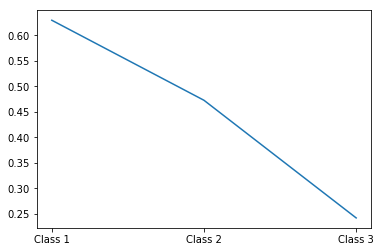

In [35]:
my_xticks = ['Class 1','Class 2','Class 3']
x = [1,2,3]
plt.xticks(x, my_xticks)
plt.plot(x, [class_1_surv, class_2_surv, class_3_surv])
plt.show()

In [36]:
males = len(titanic[titanic['gender'] == 1])
females = len(titanic[titanic['gender'] == 2])

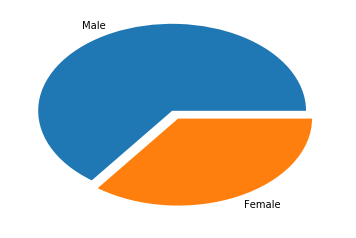

In [37]:
plt.pie([males,females],
       labels = ['Male', 'Female'],
       explode = [0.10, 0],
       startangle = 0)
plt.show()

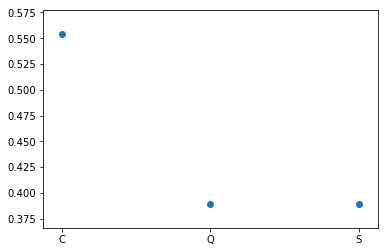

In [38]:
C_surv = titanic[titanic['Embarked'] == 'C'].mean()['Survived']
Q_surv = titanic[titanic['Embarked'] == 'Q'].mean()['Survived']
S_surv = titanic[titanic['Embarked'] == 'Q'].mean()['Survived']
my_xticks = ['C','Q','S']
x = [1,2,3]
plt.xticks(x, my_xticks)
plt.scatter(x, [C_surv, Q_surv, S_surv])
plt.show()

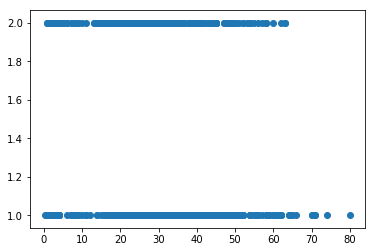

In [39]:
plt.scatter(titanic['Age'], titanic['gender'])
plt.show()

In [40]:
survived = titanic[titanic['Survived'] == 1]
surv_avg = survived.mean()['Age']
not_survived = titanic[titanic['Survived'] == 0]
nsurv_avg = not_survived.mean()['Age']

In [41]:
def fillavg(survv):
    if survv == 1:
        return surv_avg
    else:
        return nsurv_avg

In [42]:
titanic['avg'] = titanic.Survived.apply(fillavg)

In [43]:
titanic.Age.fillna(titanic['avg'], inplace = True)
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,gender,avg
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.750072,0.523008,0.381594,32.204208,1.352413,29.750072
std,0.486592,0.836071,13.010682,1.102743,0.806057,49.693429,0.477990,1.110642
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,28.343690
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000,28.343690
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200,1.000000,30.626179
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000,30.626179
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,2.000000,30.626179


In [44]:
del titanic['avg']

In [45]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,gender
PassengerId,,,,,,,,
1,0,3,22.0,1,0,7.2500,S,1
2,1,1,38.0,1,0,71.2833,C,2
3,1,3,26.0,0,0,7.9250,S,2
4,1,1,35.0,1,0,53.1000,S,2
5,0,3,35.0,0,0,8.0500,S,1


# Decison Tree

In [46]:
from sklearn import datasets
from sklearn import tree
import pydotplus
from IPython.display import Image

In [47]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [48]:
clf = RandomForestClassifier()
survived = titanic['Survived']
del titanic['Survived']
del titanic['Embarked']

In [49]:
'''#Code for mapping 
sklearn preprocessing
con = prepro.encoder ...'''

'#Code for mapping \nsklearn preprocessing\ncon = prepro.encoder ...'

In [50]:
'''titanic.head()
titanic1 = titanic
del titanic1['Survived']'''

"titanic.head()\ntitanic1 = titanic\ndel titanic1['Survived']"

In [51]:
titanic.head()

,Pclass,Age,SibSp,Parch,Fare,gender
PassengerId,,,,,,
1,3,22.0,1,0,7.2500,1
2,1,38.0,1,0,71.2833,2
3,3,26.0,0,0,7.9250,2
4,1,35.0,1,0,53.1000,2
5,3,35.0,0,0,8.0500,1


In [52]:
from sklearn import cross_validation
X_Train, X_Test, Y_Train, Y_Test = cross_validation.train_test_split(titanic, survived, test_size = 0.2)

In [30]:
clf.fit(X_Train, Y_Train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [46]:
#Random Forest
clf.score(X_Test, Y_Test)

0.94972067039106145

In [32]:
from sklearn import tree

In [33]:
#Decision Tree
clf1 = tree.DecisionTreeClassifier()
clf1.fit(X_Train, Y_Train)
clf1.score(X_Test, Y_Test)

0.7039106145251397

In [34]:
from sklearn import tree
import pydotplus
dot_data = tree.export_graphviz(clf1, out_file=None,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('titanic - Decision Forest.pdf')

True

# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [43]:
logreg = LogisticRegression()

In [44]:
logreg.fit(X_Train, Y_Train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
logreg.score(X_Test, Y_Test)

0.81005586592178769

# Neural Network

In [95]:
from sklearn import cross_validation
X_Train, X_Test, Y_Train, Y_Test = cross_validation.train_test_split(titanic, survived, test_size = 0.2)

In [96]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes = (100,100,100,), solver = 'lbfgs', activation = 'logistic')
clf.fit(X_Train, Y_Train)
clf.score(X_Test, Y_Test)

0.83798882681564246